In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
# load dataset
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# number of rows
df.shape[0]

1599

In [ ]:
# number of columns
df.shape[1]

12

In [ ]:
#train-test split
train_df = df.sample(frac=0.75, random_state=4)
val_df = df.drop(train_df.index)

In [ ]:
#scaling
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)

range = max_val - min_val
train_df = (train_df - min_val)/(range)

val_df =  (val_df- min_val)/range

In [ ]:
# separate targets and labels
X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']

#shape of input
input_shape = [X_train.shape[1]]
input_shape

[11]

In [ ]:
# Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu',input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model
model.compile(optimizer='adam', loss='mae')

In [ ]:
# training the model
losses = model.fit(X_train, y_train,
                   validation_data=(X_val, y_val),
                   batch_size=256,
                   epochs=15,
                   )

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.5145 - val_loss: 0.3341
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2834 - val_loss: 0.1403
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1346 - val_loss: 0.1473
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1558 - val_loss: 0.1484
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1421 - val_loss: 0.1221
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1215 - val_loss: 0.1186
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1221 - val_loss: 0.1204
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1190 - val_loss: 0.1132
Epoch 9/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1110 - val_loss: 0.1126
Epoch 10/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1107 - val_loss: 0.1118
Epoch 11/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1103 - val_loss: 0.1093
Epoch 12/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1088 - val_loss: 0.1085
Epoch 13/

In [ ]:
# Generate predictions
model.predict(X_val.iloc[0:3, :])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.45523682],
       [0.5584238 ],
       [0.4422414 ]], dtype=float32)

In [ ]:
#Target value
y_val.iloc[0:3]

,quality
0,0.4
9,0.4
12,0.4


<Axes: >

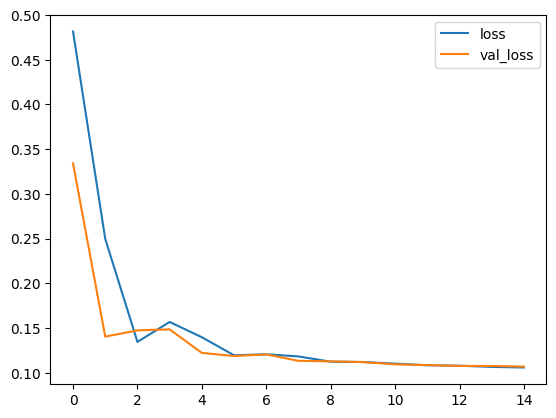

In [ ]:
#training vs validation
loss_df = pd.DataFrame(losses.history)
loss_df.loc[:,['loss','val_loss']].plot()